In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

import sys
sys.path.append('..')

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.utils import array_to_img

from models.utils import decode_and_resize
from models.trainer import get_model
from models.network import ada_in

In [3]:
tf.__version__

'2.13.0'

In [4]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

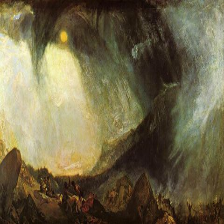

In [23]:
test_style = decode_and_resize("../data/sample/William_Turner_16.jpg")
test_content = decode_and_resize("../data/sample/hp2.jpg")

test_style = tf.expand_dims(test_style, axis=0)
test_content = tf.expand_dims(test_content, axis=0)

tf.keras.utils.array_to_img(test_style[0])

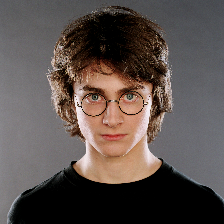

In [24]:
tf.keras.utils.array_to_img(test_content[0])

In [7]:
def predict(model):
    test_style_encoded = model.encoder(test_style)
    test_content_encoded = model.encoder(test_content)

    # Compute the AdaIN features.
    test_t = ada_in(style=test_style_encoded, content=test_content_encoded)
    test_reconstructed_image = model.decoder(test_t)

    # Plot the Style, Content and the NST image.
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
    ax[0].imshow(array_to_img(test_style[0]))
    ax[1].imshow(array_to_img(test_content[0]))
    ax[2].imshow(tf.keras.utils.array_to_img(test_reconstructed_image[0]))

    plt.show()

In [8]:
model = get_model()
model.load_weights("../saved_models/art_style/art_style.keras")

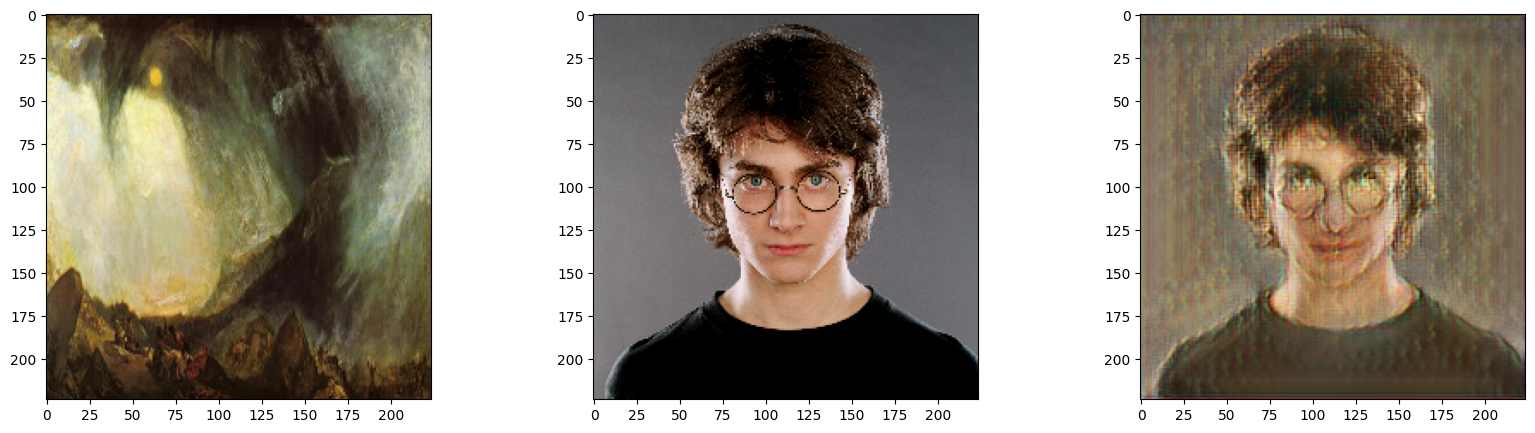

In [25]:
predict(model)

2023-08-08 16:18:06.484163: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_6' with dtype string and shape [7000]
	 [[{{node Placeholder/_6}}]]
2023-08-08 16:18:06.484399: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_6' with dtype string and shape [7000]
	 [[{{node Placeholder/_6}}]]


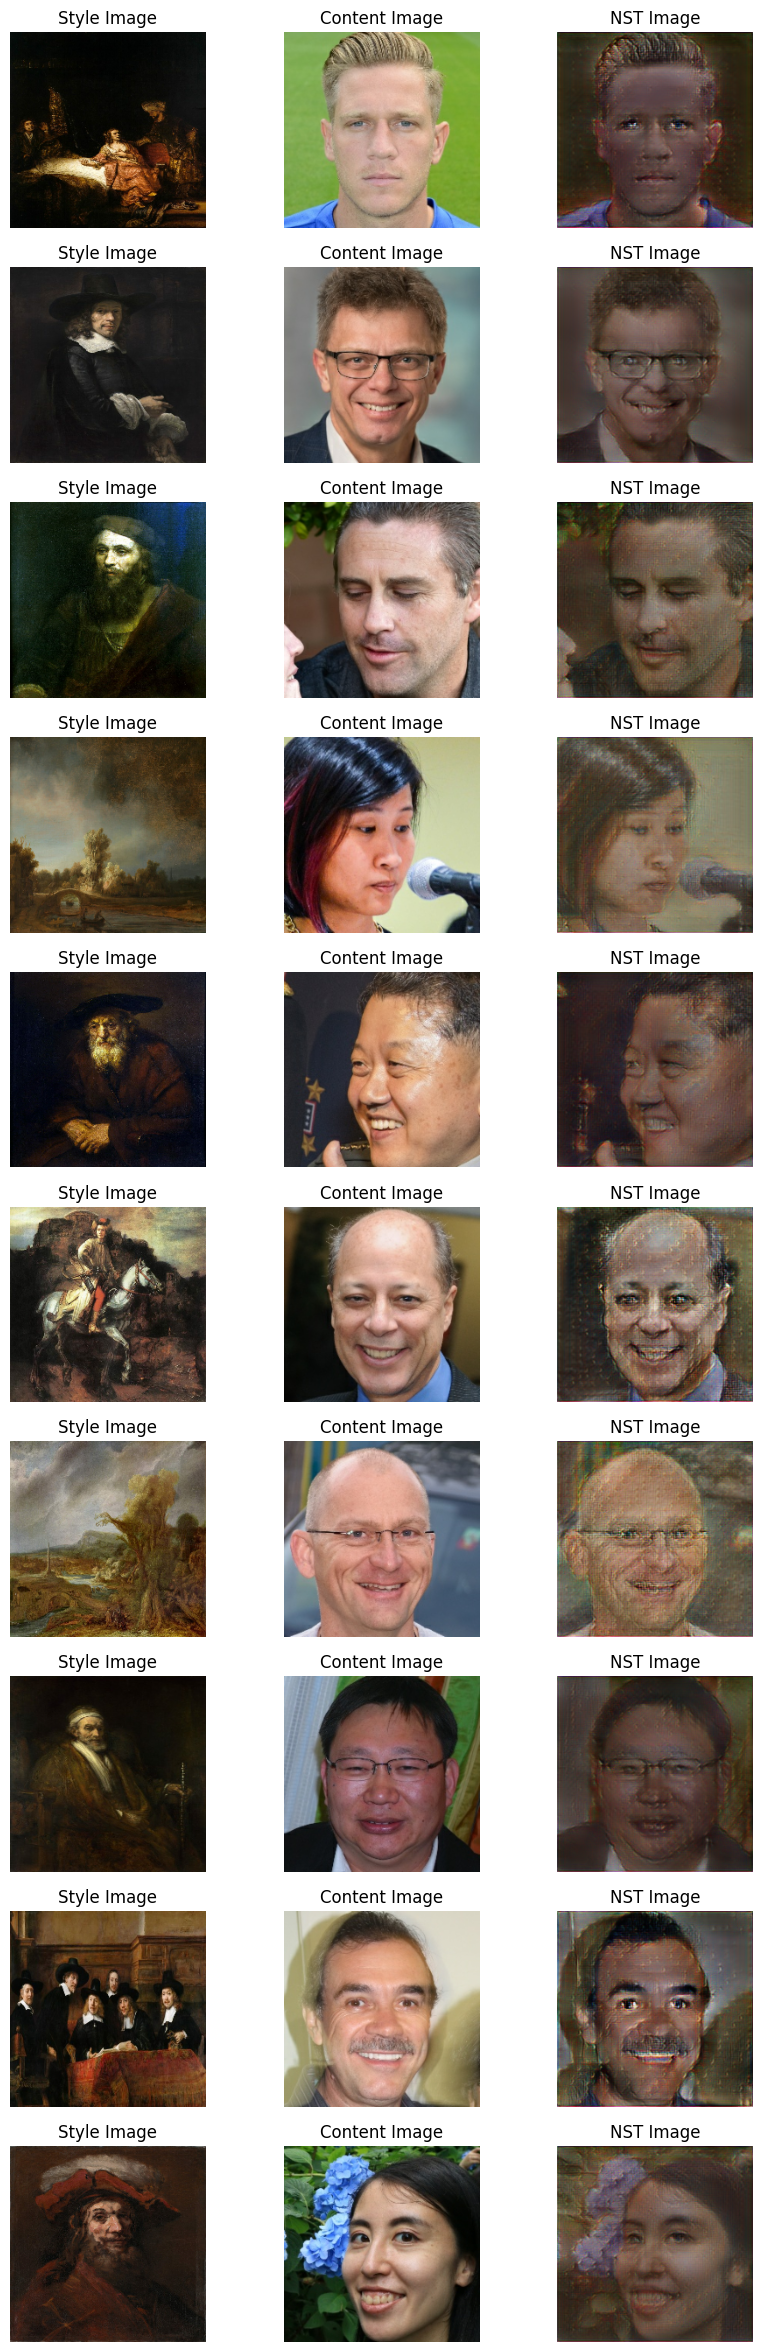

In [33]:
for style, content in test_ds.take(1):
    style_encoded = model.encoder(style)
    content_encoded = model.encoder(content)
    t = ada_in(style=style_encoded, content=content_encoded)
    reconstructed_image = model.decoder(t)
    fig, axes = plt.subplots(nrows=10, ncols=3, figsize=(10, 30))
    [ax.axis("off") for ax in np.ravel(axes)]

    for axis, style_image, content_image, reconstructed_image in zip(
        axes, style[0:10], content[0:10], reconstructed_image[0:10]
    ):
        (ax_style, ax_content, ax_reconstructed) = axis
        ax_style.imshow(style_image)
        ax_style.set_title("Style Image")
        ax_content.imshow(content_image)
        ax_content.set_title("Content Image")
        ax_reconstructed.imshow(reconstructed_image)
        ax_reconstructed.set_title("NST Image")